In [169]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [170]:
# Load train and test data
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('test.csv')

In [171]:
# Checking for missing values
print("Missing values in Train Data:\n", train_data.isnull().sum())
print("\nMissing values in Test Data:\n", test_data.isnull().sum())

Missing values in Train Data:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values in Test Data:
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [172]:
# Filling missing values
for data in [train_data, test_data]:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
    data['Outlet_Size'].fillna('Medium', inplace=True)

/var/folders/28/vmfgqzyx7r7ghdy44b0802wr0000gn/T/ipykernel_31779/2139821362.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
/var/folders/28/vmfgqzyx7r7ghdy44b0802wr0000gn/T/ipykernel_31779/2139821362.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [173]:
# Standardizing categorical values
train_data['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
test_data['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)

/var/folders/28/vmfgqzyx7r7ghdy44b0802wr0000gn/T/ipykernel_31779/801618164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
/var/folders/28/vmfgqzyx7r7ghdy44b0802wr0000gn/T/ipykernel_31779/801618164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work beca

In [174]:
# Creating a new feature: Number of years since establishment
train_data['num_years'] = 2013 - train_data['Outlet_Establishment_Year']
test_data['num_years'] = 2013 - test_data['Outlet_Establishment_Year']

In [175]:
# Handling categorical variables using One-Hot Encoding
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
train_datar = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_datar = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

In [176]:
# Ensuring both train and test datasets have the same features
train_datar, test_datar = train_datar.align(test_datar, join='left', axis=1, fill_value=0)

In [177]:
# Selecting features for training
feat_cols = [col for col in train_datar.columns if col not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier']]
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

In [178]:
# Splitting data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [179]:
# Training XGBoost Model
XGB = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, random_state=42)
XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [180]:
# Predictions on validation data
y_pred = XGB.predict(X_test)

In [181]:
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Model Performance:
RMSE: 1184.8960638142962
R² Score: 0.5203122306817838


In [182]:
# Predicting on actual test data
X_t = test_datar[feat_cols]
y_result = np.maximum(0, XGB.predict(X_t))


In [183]:
# Creating a results DataFrame
result = pd.DataFrame({
    'Item_Identifier': test_data['Item_Identifier'],
    'Outlet_Identifier': test_data['Outlet_Identifier'],
    'Item_Outlet_Sales': y_result
})

In [184]:
# Sorting and saving results
result = result.sort_index()
result.to_csv('Bigmart_XGBoost3.csv', index=False)
print("\nSubmission file 'Bigmart_XGBoost3.csv' created successfully!")


Submission file 'Bigmart_XGBoost3.csv' created successfully!


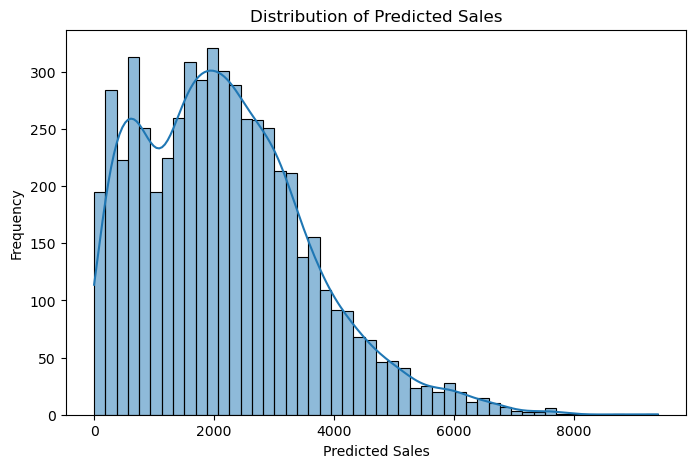

In [185]:
# Plotting the distribution of predictions
plt.figure(figsize=(8, 5))
sns.histplot(y_result, bins=50, kde=True)
plt.title("Distribution of Predicted Sales")
plt.xlabel("Predicted Sales")
plt.ylabel("Frequency")
plt.show()